In [1]:
import nnutil
import torch 
import torch.nn as nn
import torch.optim as optim
import pandas as pd
device = nnutil.device
device

device = cuda


device(type='cuda')

In [2]:
gen_met = pd.read_csv("TCGA-BRCA-Integrated-Data-Clear.csv")
gen_met

,5S_rRNA;DTNBP1,7SK;RP11-661A12.4;RP11-661A12.5;ZC3H3,7SK;RP11-661A12.4;ZC3H3,A1BG,A1BG;A1BG-AS1;CTD-2619J13.5;CTD-2619J13.8,A1BG;A1BG-AS1;CTD-2619J13.8,A1BG;A1BG-AS1;CTD-2619J13.8;ZNF497,A2M,A2M-AS1;LINC00612,A2ML1,...,AL357874.3,C8orf44,AC234782.2,AL354833.1,AL133351.4,AC010980.1,AC073611.1,AL592295.6,AL391628.1,AP006621.6
0,0.939074,0.458490,0.026334,0.846989,0.740351,0.504852,0.962965,0.712600,0.165486,0.855594,...,0.1406,0.4674,0.0021,0.0451,0.2320,0.0359,0.0327,4.2408,0.0083,0.3009
1,0.900483,0.201106,0.028668,0.859027,0.768030,0.565033,0.902742,0.736713,0.312559,0.860085,...,0.7130,1.8876,0.0000,0.0485,0.5191,0.0193,0.0401,1.4151,0.0074,0.1786
2,0.930533,0.454185,0.021135,0.861856,0.361928,0.474844,0.883992,0.743776,0.134031,0.831905,...,0.2001,2.2743,0.0430,0.1983,0.8729,0.0656,0.0883,4.2486,0.0186,0.0290
3,0.896662,0.522737,0.046579,0.772512,0.875490,0.504235,0.780597,0.679506,0.089505,0.470751,...,1.4378,5.3136,1.2289,0.5859,1.3232,0.4655,0.4297,5.9763,0.0261,0.1869
4,0.918370,0.628709,0.049960,0.792261,0.793636,0.498327,0.907573,0.695860,0.178971,0.759081,...,1.0553,1.1631,0.0022,0.0139,0.8311,0.0000,0.0239,2.0041,0.0226,0.7618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,0.920768,0.590763,0.029190,0.624791,0.710404,0.532255,0.918787,0.706865,0.198287,0.857114,...,0.3636,0.7487,0.0170,0.0510,0.4501,0.0596,0.0590,3.4761,0.0037,0.2317
776,0.879078,0.554761,0.029572,0.881790,0.846596,0.563566,0.931964,0.754018,0.311176,0.822956,...,0.2478,2.8641,0.0339,0.1304,0.8873,0.0152,0.4205,3.2948,0.0548,0.4576
777,0.844010,0.178100,0.048187,0.431711,0.837484,0.190997,0.885233,0.680017,0.070954,0.909495,...,0.4070,2.1495,0.0021,0.0633,1.7822,0.0449,0.1731,2.7585,0.0388,7.4731
778,0.884928,0.206675,0.022819,0.605210,0.556078,0.476714,0.936399,0.521604,0.082107,0.522834,...,0.5760,0.6806,0.0187,0.0436,0.4583,0.1968,0.0574,4.2266,0.0073,0.0417


In [10]:

class AutoEncoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim),
            nn.Tanh(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, input_dim),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
def train_ae(model, dataloader, num_epochs=1000, learning_rate=0.00001):
    epoch_losses = []
    
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        epoch_loss = 0
        for data in dataloader:
            inputs, _ = data
            inputs = inputs.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            epoch_loss += loss.item()
            loss.backward(retain_graph=True)
            optimizer.step()
        epoch_loss /= len(dataloader)
        epoch_losses.append(epoch_loss)
        if epoch % 10 == 0:
            print('Epoch [{}/{}], Loss: {}'.format(epoch+1, num_epochs, loss.item()))
    
    return epoch_losses

In [11]:
from torch.utils.data import DataLoader, TensorDataset, Dataset
print(gen_met.shape)
integration_dimensions = [2048, 1024, 512, 256, 128]
# integration_dimensions = [128]
dim_losses = []
input_dim = gen_met.shape[1]

dataloader, data_tensor, nor_data_tensor, l, ae_mean, ae_std = nnutil.data_prehandle(df=gen_met)
# batch_size = 128
# data_tensor = torch.from_numpy(gen_met.values).to(torch.float32)
# train_dataset = TensorDataset(data_tensor, data_tensor)
# dataloader = DataLoader(dataset=train_dataset, batch_size=batch_size)

(780, 56123)
data.shape:(780, 56122), data_tensor:torch.Size([780, 56122])


In [12]:
nor_data_tensor[0:3,:]

tensor([[-0.0276, -0.0303, -0.0327,  ..., -0.0089, -0.0329, -0.0312],
        [-0.0278, -0.0318, -0.0327,  ..., -0.0249, -0.0329, -0.0319],
        [-0.0276, -0.0303, -0.0328,  ..., -0.0089, -0.0328, -0.0327]])

In [13]:
type(l)

pandas.core.series.Series

In [14]:
nor_data_tensor.shape

torch.Size([780, 56122])

In [15]:
for dimension in integration_dimensions:
    print(f"handling dimension: {dimension}")
    ae_model = AutoEncoder(data_tensor.shape[1], dimension).to(device)
    print(ae_model)
    dim_loss = train_ae(ae_model, dataloader, num_epochs=500,learning_rate=0.00001)
    data_integration = ae_model.encoder(nor_data_tensor.to(device))
    x_df = pd.DataFrame(data_integration.cpu().detach().numpy())
    data_df = pd.concat([x_df, l], axis=1)
    data_df.to_csv(f"TCGA-BRCA-Integration-{dimension}.csv", index=False)
    dim_losses.append(dim_loss)

handling dimension: 2048
AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=56122, out_features=2048, bias=True)
    (1): Tanh()
  )
  (decoder): Sequential(
    (0): Linear(in_features=2048, out_features=56122, bias=True)
    (1): Tanh()
  )
)
Epoch [1/500], Loss: 4.387531280517578
Epoch [11/500], Loss: 1.2264865636825562
Epoch [21/500], Loss: 0.49155986309051514
Epoch [31/500], Loss: 0.49614641070365906
Epoch [41/500], Loss: 1.4475328922271729
Epoch [51/500], Loss: 0.7935131788253784
Epoch [61/500], Loss: 0.21641241014003754
Epoch [71/500], Loss: 0.6306858062744141
Epoch [81/500], Loss: 0.5467439889907837
Epoch [91/500], Loss: 0.6175073981285095
Epoch [101/500], Loss: 0.5269657373428345
Epoch [111/500], Loss: 0.19107121229171753
Epoch [121/500], Loss: 0.5769107341766357
Epoch [131/500], Loss: 0.6363458633422852
Epoch [141/500], Loss: 0.1962130218744278
Epoch [151/500], Loss: 2.307103395462036
Epoch [161/500], Loss: 0.3353062570095062
Epoch [171/500], Loss: 0.6882336139

In [20]:
import json
result_plot = []

for integration_dimension, dim_loss in zip(integration_dimensions, dim_losses):
    print(f"{integration_dimension}")
    loss_json = {
        "dim": integration_dimension,
        "label": f"Integration Dimension = {integration_dimension}",
        "epoch_loss": dim_loss
    }
    result_plot.append(loss_json)
with open('result_ae_plot3.json', 'w') as f:
    json.dump(result_plot, f)

2048
1024
512
256
128


In [21]:
import json
with open('result_ae_plot2.json', 'r') as f:
    result_losses = json.load(f)

In [40]:
import matplotlib.pyplot as plt
def plot_loss_curves(result_losses):
    """
    绘制多个损失曲线。

    参数:
    epoch_losses (list of list of float): 每个一维数组表示不同条件下的训练损失。
    """
    
    plt.figure(figsize=(8, 8))
    fontsize=15
    for result_l in result_losses:
        plt.plot(result_l["epoch_loss"], label=result_l["label"])

    plt.xlabel('Epoch', fontsize=fontsize)
    plt.ylabel('Loss', fontsize=fontsize)
    plt.title('Integration Loss', fontsize=fontsize)
    plt.ylim(ymax=0.3, ymin=-0.01)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.savefig("integration_loss.eps", dpi=300, format="eps")
    plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


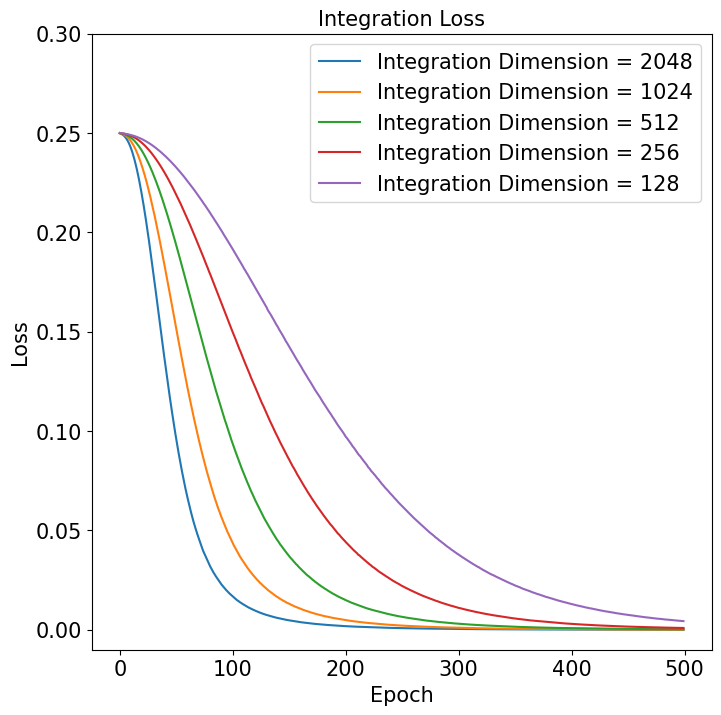

In [41]:
plot_loss_curves(result_losses)